In [92]:
import matplotlib as plt
import pandas as pd
import numpy as np

In [105]:
import pandas as pd
import glob
import os

# Define a pattern to match your files (e.g., all .csv files in the directory)
csv_files = glob.glob('./*.csv')

# Create an empty list to store DataFrames
df_list = []

# Iterate over each CSV file
for file in csv_files:
    # Read the CSV into a DataFrame
    df = pd.read_csv(file)
    
    # Extract parameters from the filename
    filename = os.path.basename(file)  # Get the filename
    parts = filename.split('_')  # Split by underscore to get the parameters
    
    # Check if 'AUG' is in the filename
    aug_flag = 1 if 'AUG' in filename else 0
    
    # Extract the other parameters from the parts list
    lr = float(parts[1 + aug_flag].replace('lr', ''))  # Extract learning rate (next part after layer)
    layer = float(parts[2+aug_flag].replace('l', ''))
    wd = float(parts[3 + aug_flag].replace('wd', ''))  # Extract weight decay
    drop = float(parts[4 + aug_flag].replace('drop', ''))  # Extract dropout
    batch_size = int(parts[5 + aug_flag].replace('b', ''))  # Extract batch size
    epochs = int(parts[6 + aug_flag].replace('te', '').strip('.csv'))  # Extract total epochs
    
    # Add columns for each extracted parameter
    df['learn_rate'] = lr
    df['layer'] = layer
    df['weight_decay'] = wd
    df['dropout'] = drop
    df['batch_size'] = batch_size
    df['total_epochs'] = epochs
    df['AUG'] = aug_flag  # Add the AUG flag column
    
    # Append the DataFrame to the list
    df_list.append(df)

# Concatenate all DataFrames into a single DataFrame
final_df = pd.concat(df_list, ignore_index=True)

# Display the final DataFrame
# import ace_tools as tools; tools.display_dataframe_to_user(name="Combined DataFrame", dataframe=final_df)
final_df.shape


(3589, 12)

In [106]:
# Assuming the final dataframe has columns for validation loss, epoch, and configuration parameters
# For simplicity, let's assume there's a column 'val_loss' for validation loss

# Group by the parameters and epoch
aggregated_df = final_df.groupby(['learn_rate', 'layer', 'weight_decay', 'dropout', 'batch_size', 'total_epochs', 'AUG', 'epoch']).agg({
    'val_loss': 'mean',  # Aggregating the validation loss by taking the mean over all folds
    'train_loss': 'mean',
    'val_accuracy': 'mean'
}).reset_index()

# Now you have the aggregated validation loss by epoch for each parameter combination


In [107]:
aggregated_df.head(50)

,learn_rate,layer,weight_decay,dropout,batch_size,total_epochs,AUG,epoch,val_loss,train_loss,val_accuracy
0,0.0002,0.0,0.15,0.8,64,15,0,1,1.220053,1.815052,0.693223
1,0.0002,0.0,0.15,0.8,64,15,0,2,0.823167,0.893965,0.715355
2,0.0002,0.0,0.15,0.8,64,15,0,3,0.604803,0.562444,0.827873
3,0.0002,0.0,0.15,0.8,64,15,0,4,0.383488,0.338001,0.877568
4,0.0002,0.0,0.15,0.8,64,15,0,5,0.367857,0.213641,0.883500
5,0.0002,0.0,0.15,0.8,64,15,0,6,0.196759,0.133134,0.940137
6,0.0002,0.0,0.15,0.8,64,15,0,7,0.147255,0.062765,0.952577
7,0.0002,0.0,0.15,0.8,64,15,0,8,0.144122,0.045527,0.953342
8,0.0002,0.0,0.15,0.8,64,15,0,9,0.132848,0.041670,0.958221
9,0.0002,0.0,0.15,0.8,64,15,0,10,0.137405,0.024550,0.955196


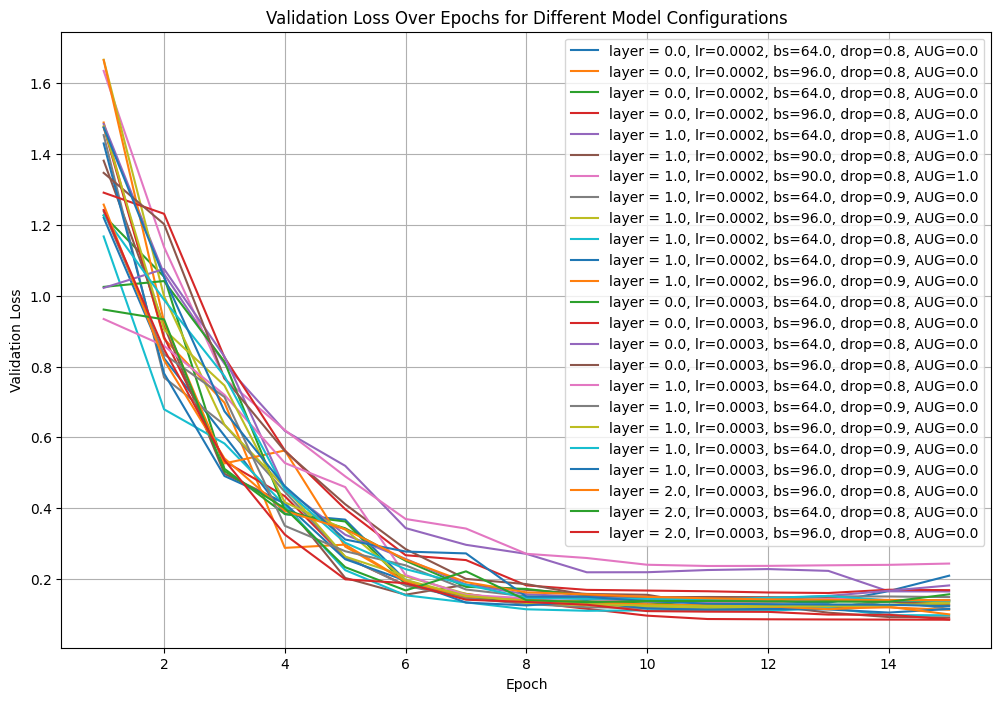

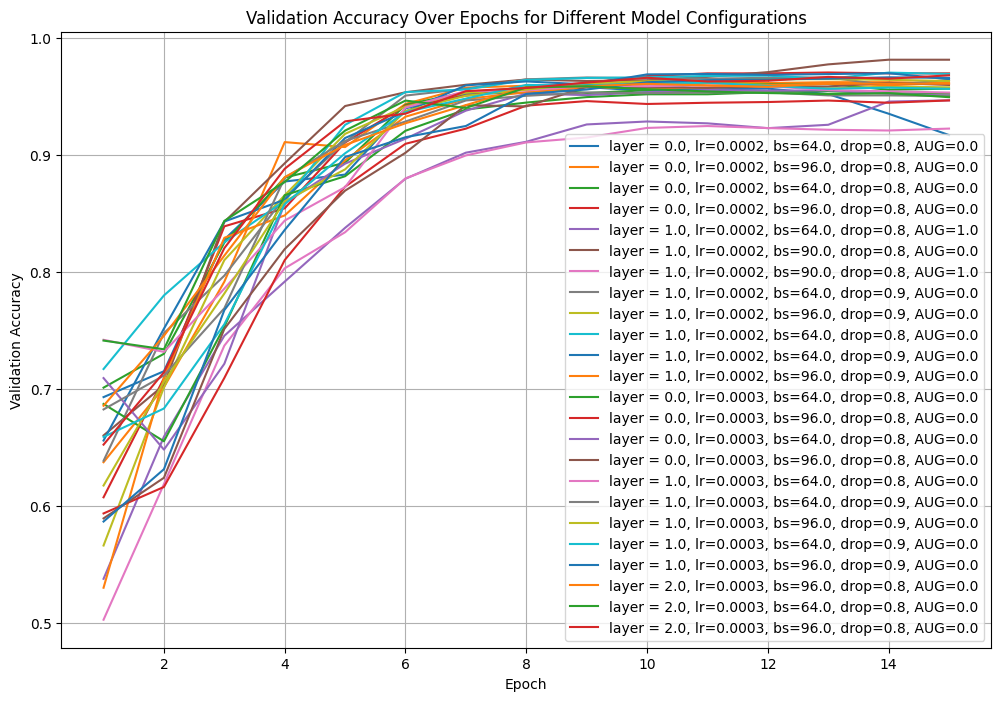

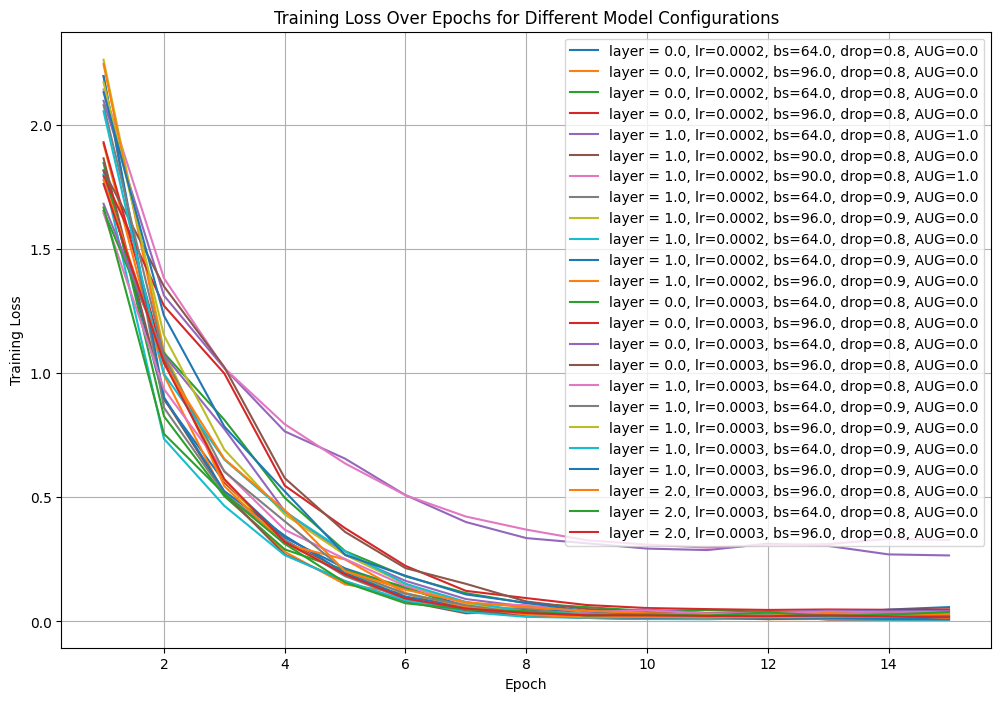

In [108]:
import matplotlib.pyplot as plt

# Unique parameter combinations to plot
config_combinations = aggregated_df[['learn_rate', 'layer', 'weight_decay', 'dropout', 'batch_size', 'AUG']].drop_duplicates()

# Plotting each configuration
plt.figure(figsize=(12, 8))

for idx, config in config_combinations.iterrows():
    # Filter the dataframe for this particular configuration
    config_filter = (aggregated_df['learn_rate'] == config['learn_rate']) & \
                    (aggregated_df['layer'] == config['layer']) & \
                    (aggregated_df['weight_decay'] == config['weight_decay']) & \
                    (aggregated_df['dropout'] == config['dropout']) & \
                    (aggregated_df['batch_size'] == config['batch_size']) & \
                    (aggregated_df['AUG'] == config['AUG'])

    config_df = aggregated_df[config_filter]
    
    # Plot the validation loss for this configuration
    plt.plot(config_df['epoch'], config_df['val_loss'], label=f"layer = {config['layer']}, lr={config['learn_rate']}, bs={config['batch_size']}, drop={config['dropout']}, AUG={config['AUG']}")

plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss Over Epochs for Different Model Configurations')
plt.legend()
plt.grid(True)
plt.show()

# Plotting each configuration
plt.figure(figsize=(12, 8))

for idx, config in config_combinations.iterrows():
    # Filter the dataframe for this particular configuration
    config_filter = (aggregated_df['learn_rate'] == config['learn_rate']) & \
                    (aggregated_df['layer'] == config['layer']) & \
                    (aggregated_df['weight_decay'] == config['weight_decay']) & \
                    (aggregated_df['dropout'] == config['dropout']) & \
                    (aggregated_df['batch_size'] == config['batch_size']) & \
                    (aggregated_df['AUG'] == config['AUG'])

    config_df = aggregated_df[config_filter]
    
    # Plot the validation loss for this configuration
    plt.plot(config_df['epoch'], config_df['val_accuracy'], label=f"layer = {config['layer']}, lr={config['learn_rate']}, bs={config['batch_size']}, drop={config['dropout']}, AUG={config['AUG']}")

plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Over Epochs for Different Model Configurations')
plt.legend()
plt.grid(True)
plt.show()

# Plotting each configuration
plt.figure(figsize=(12, 8))

for idx, config in config_combinations.iterrows():
    # Filter the dataframe for this particular configuration
    config_filter = (aggregated_df['learn_rate'] == config['learn_rate']) & \
                    (aggregated_df['layer'] == config['layer']) & \
                    (aggregated_df['weight_decay'] == config['weight_decay']) & \
                    (aggregated_df['dropout'] == config['dropout']) & \
                    (aggregated_df['batch_size'] == config['batch_size']) & \
                    (aggregated_df['AUG'] == config['AUG'])

    config_df = aggregated_df[config_filter]
    
    # Plot the validation loss for this configuration
    plt.plot(config_df['epoch'], config_df['train_loss'], label=f"layer = {config['layer']}, lr={config['learn_rate']}, bs={config['batch_size']}, drop={config['dropout']}, AUG={config['AUG']}")

plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss Over Epochs for Different Model Configurations')
plt.legend()
plt.grid(True)
plt.show()



In [126]:
# 1. Group by the configuration columns and fold, and then find the last epoch for each fold
last_epoch_df = final_df.groupby(['learn_rate', 'layer', 'weight_decay', 'dropout', 'batch_size', 'total_epochs', 'AUG', 'fold'])['epoch'].max().reset_index()

# 2. Merge this back with the original DataFrame to keep the full information for the last epoch of each fold
last_epoch_df = pd.merge(final_df, last_epoch_df, on=['learn_rate', 'layer', 'weight_decay', 'dropout', 'batch_size', 'total_epochs', 'AUG', 'fold', 'epoch'])

# 3. Now, `last_epoch_df` should contain only the last epoch for each fold, keeping the configurations intact
#    We can now sort and aggregate based on the average accuracy for the last epoch
last_epoch_df_sorted = last_epoch_df.sort_values(by='val_accuracy', ascending=False)

# 4. Select the top configurations based on the highest average `val_accuracy` at the last epoch
# Optionally, you can aggregate the validation accuracy across folds for each configuration
top_configurations = last_epoch_df_sorted.groupby(
    ['learn_rate', 'layer', 'weight_decay', 'dropout', 'batch_size', 'total_epochs', 'AUG']
).agg({'val_accuracy': 'mean'}).reset_index()

# 5. Sort and display the top configurations based on the aggregated validation accuracy
top_configurations = top_configurations.sort_values(by='val_accuracy', ascending=False)

# Display the top configurations (top 10 for example)
top_configurations_display = top_configurations.head(10)

top_configurations_display

,learn_rate,layer,weight_decay,dropout,batch_size,total_epochs,AUG,val_accuracy
7,0.0002,1.0,0.15,0.9,64,15,0,0.968854
10,0.0002,1.0,0.20,0.9,64,15,0,0.968043
9,0.0002,1.0,0.20,0.8,64,15,0,0.967848
5,0.0002,1.0,0.15,0.8,90,15,0,0.967144
20,0.0003,1.0,0.20,0.9,96,15,0,0.966676
18,0.0003,1.0,0.15,0.9,96,15,0,0.965587
3,0.0002,0.0,0.20,0.8,96,15,0,0.964749
2,0.0002,0.0,0.20,0.8,64,15,0,0.963524
1,0.0002,0.0,0.15,0.8,96,15,0,0.962823
19,0.0003,1.0,0.20,0.9,64,15,0,0.962739


In [ ]:
# Check how many unique epochs each fold has
print(final_df.groupby('fold')['epoch'].nunique())

fold
1     15
2     15
3     15
4     15
5     15
6     15
7     15
8     15
9     15
10    15
Name: epoch, dtype: int64


In [127]:
df_results = pd.read_csv('/home/asm2fe/UrbanAdversary/DenseNet161_lr0.0002_l1_wd0.15_drop0.9_b64_te15.csv')

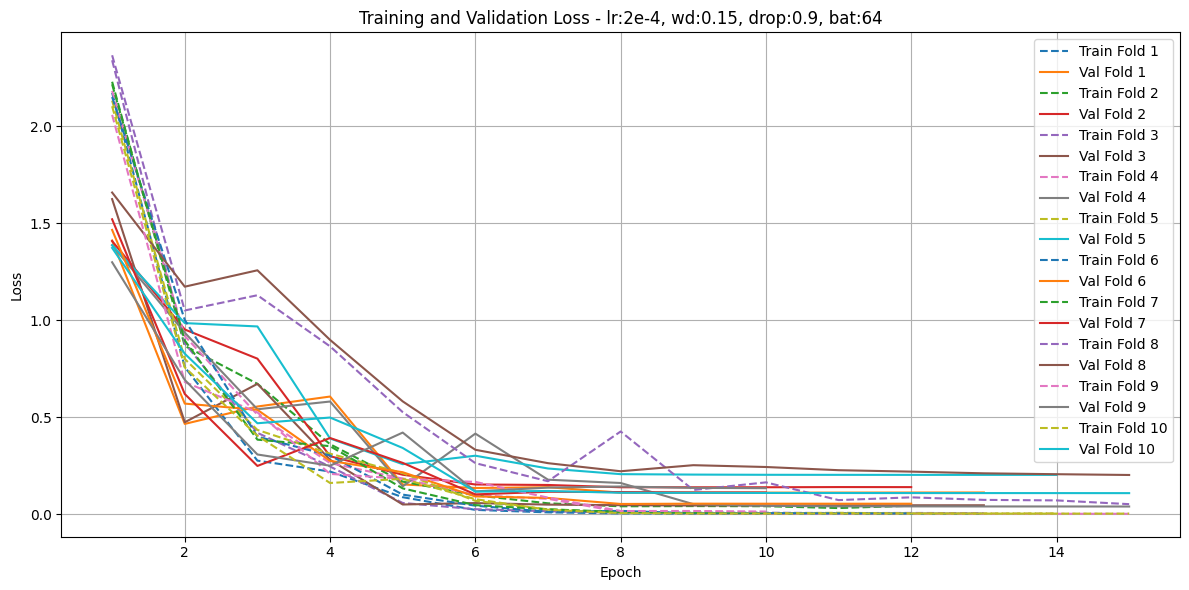

In [128]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for fold in df_results["fold"].unique():
    fold_data = df_results[df_results["fold"] == fold]
    plt.plot(fold_data["epoch"], fold_data["train_loss"], linestyle="--", label=f"Train Fold {fold}")
    plt.plot(fold_data["epoch"], fold_data["val_loss"], linestyle="-", label=f"Val Fold {fold}")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss - lr:2e-4, wd:0.15, drop:0.9, bat:64")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [129]:
final_accuracies = df_results.groupby("fold")["val_accuracy"].last().tolist()
final_loss = df_results.groupby("fold")["val_loss"].last().tolist()
average_loss = df_results.groupby("fold")['val_loss'].last().mean()

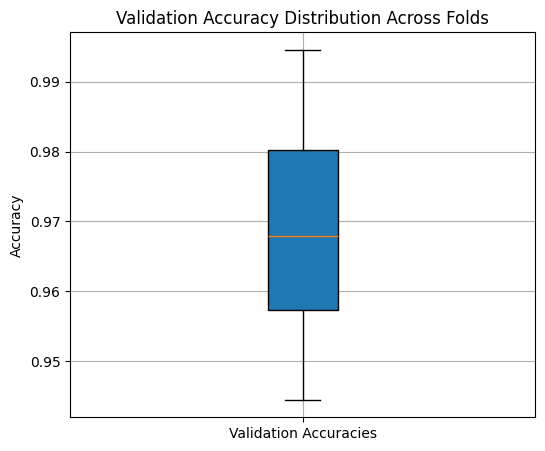

In [130]:
plt.figure(figsize=(6, 5))
plt.boxplot(final_accuracies, vert=True, patch_artist=True)
plt.title("Validation Accuracy Distribution Across Folds")
plt.ylabel("Accuracy")
plt.xticks([1], ['Validation Accuracies'])
plt.grid(True)
plt.show()


In [131]:
print(np.mean(final_accuracies))
print(final_accuracies)
print(average_loss)

0.9688536256068019
[0.9714285714285714, 0.9550561797752808, 0.9945945945945946, 0.9848484848484848, 0.952127659574468, 0.9757575757575756, 0.9642857142857144, 0.9444444444444444, 0.9817073170731708, 0.9642857142857144]
0.11418503094464535
